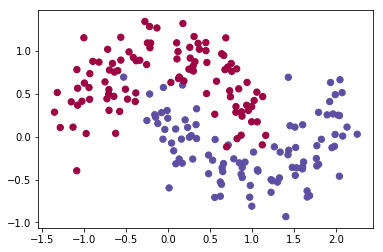

Loss after iteration 0: 0.435568
Loss after iteration 1000: 0.190421
Loss after iteration 2000: 0.149214
Loss after iteration 3000: 0.102361
Loss after iteration 4000: 0.176411
Loss after iteration 5000: 0.109723
Loss after iteration 6000: 0.104360
Loss after iteration 7000: 0.100197
Loss after iteration 8000: 0.096650
Loss after iteration 9000: 0.093450
Loss after iteration 10000: 0.090519
Loss after iteration 11000: 0.087871
Loss after iteration 12000: 0.085522
Loss after iteration 13000: 0.083465
Loss after iteration 14000: 0.081682
Loss after iteration 15000: 0.080148
Loss after iteration 16000: 0.078834
Loss after iteration 17000: 0.077711
Loss after iteration 18000: 0.076751
Loss after iteration 19000: 0.075928


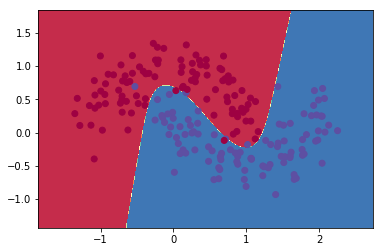

In [2]:
__author__ = 'tan_nguyen'
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

def generate_data(data='moon'):
    '''
    generate data
    :return: X: input data, y: given labels
    '''
    np.random.seed(0)
    if data == 'moon':
        X, y = datasets.make_moons(200, noise=0.20)
    elif data == 'iris':
        X, y = datasets.load_iris()
    else:
        X, y = None, None
    return X, y

def plot_decision_boundary(pred_func, X, y):
    '''
    plot the decision boundary
    :param pred_func: function used to predict the label
    :param X: input data
    :param y: given labels
    :return:
    '''
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

########################################################################################################################
########################################################################################################################
# YOUR ASSSIGMENT STARTS HERE
# FOLLOW THE INSTRUCTION BELOW TO BUILD AND TRAIN A 3-LAYER NEURAL NETWORK
########################################################################################################################
########################################################################################################################
class NeuralNetwork(object):
    """
    This class builds and trains a neural network
    """
    def __init__(self, nn_input_dim, nn_hidden_dim , nn_output_dim, actFun_type='tanh', reg_lambda=0.01, seed=0):
        '''
        :param nn_input_dim: input dimension
        :param nn_hidden_dim: the number of hidden units
        :param nn_output_dim: output dimension
        :param actFun_type: type of activation function. 3 options: 'tanh', 'sigmoid', 'relu'
        :param reg_lambda: regularization coefficient
        :param seed: random seed
        '''
        self.nn_input_dim = nn_input_dim
        self.nn_hidden_dim = nn_hidden_dim
        self.nn_output_dim = nn_output_dim
        self.actFun_type = actFun_type
        self.reg_lambda = reg_lambda
        
        # initialize the weights and biases in the network
        np.random.seed(seed)
        self.W1 = np.random.randn(self.nn_input_dim, self.nn_hidden_dim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, self.nn_hidden_dim))
        self.W2 = np.random.randn(self.nn_hidden_dim, self.nn_output_dim) / np.sqrt(self.nn_hidden_dim)
        self.b2 = np.zeros((1, self.nn_output_dim))

    def actFun(self, z, type):
        '''
        actFun computes the activation functions
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: activations
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if type.lower()=="tanh":
            return np.tanh(z)
        elif type.lower()=="sigmoid":
            return 1./(1+np.exp(-z))
        elif type.lower()=="relu":
            return z*(z>0)
        else:
            assert 0, "Wrong actFunc type!"

        return None

    def diff_actFun(self, z, type):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE        
        if type.lower()=="tanh":
            return 1 - np.square(np.tanh(z))
        elif type.lower()=="sigmoid":
            return 1/(1+np.exp(-z))*(1-1/(1+np.exp(-z)))
        elif type.lower()=="relu":
            return 1*(z>0)
        else:
            assert 0, "Wrong actFunc type!"
        return None

    def feedforward(self, X, actFun):
        '''
        feedforward builds a 3-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :param actFun: activation function
        :return:
        '''

        # YOU IMPLEMENT YOUR feedforward HERE

        self.z1 = X @ self.W1 + self.b1
        self.a1 = actFun(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return None

    def calculate_loss(self, X, y):
        '''
        calculate_loss computes the loss for prediction
        :param X: input data
        :param y: given labels
        :return: the loss for prediction
        '''
        num_examples = len(X)
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        # Calculating the loss

        # YOU IMPLEMENT YOUR CALCULATION OF THE LOSS HERE
        data_loss = -np.sum(np.eye(2)[y] * np.log(self.probs))

        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda / 2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return (1. / num_examples) * data_loss

    def predict(self, X):
        '''
        predict infers the label of a given data point X
        :param X: input data
        :return: label inferred
        '''
        self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
        return np.argmax(self.probs, axis=1)

    def backprop(self, X, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return: dL/dW1, dL/b1, dL/dW2, dL/db2
        '''

        # IMPLEMENT YOUR BACKPROP HERE
        num_examples = len(X)
        delta3 = self.probs
        delta3[range(num_examples), y] -= 1
                
        dW2 = self.a1.T @ delta3
        db2 = np.mean(delta3, axis=0)
        delta2 = delta3 @ self.W2.T * self.diff_actFun(self.z1,self.actFun_type)
        dW1 = X.T @ delta2
        db1 = np.mean(delta2, axis=0)
 
        return dW1, dW2, db1, db2

    def fit_model(self, X, y, epsilon=0.01, num_passes=20000, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        # Gradient descent.
        for i in range(0, num_passes):
            # Forward propagation
            self.feedforward(X, lambda x: self.actFun(x, type=self.actFun_type))
            # Backpropagation
            dW1, dW2, db1, db2 = self.backprop(X, y)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -epsilon * dW1
            self.b1 += -epsilon * db1
            self.W2 += -epsilon * dW2
            self.b2 += -epsilon * db2

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(X, y)))

    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        plot_decision_boundary(lambda x: self.predict(x), X, y)

def main():
    # # generate and visualize Make-Moons dataset
    X, y = generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3 , nn_output_dim=2, actFun_type='tanh')
    model.fit_model(X,y)
    model.visualize_decision_boundary(X,y)

if __name__ == "__main__":
    main()

In [43]:
"""
Write your own n layer neural network.py that builds and trains a neural network of n layers. 
Your code must be able to accept as parameters 

(1) the number of layers and 
(2) layer size. 

We provide you hints below to help you organize and implement the code, but if you have better ideas, please
feel free to implement them and ignore our hints. In your report, please tell us why you made the choice(s) you did.


Hints:

1. Create a new class, e.g DeepNeuralNetwork, that inherits NeuralNetwork in three layer neural network.py

2. In DeepNeuralNetwork, change function feedforward, backprop, calculate loss and fit model

3. Create a new class, e.g. Layer(), that implements the feedforward and 
back-prop steps for a single layer in the network

4. Use Layer.feedforward to implement DeepNeuralNetwork.feedforward

5. Use Layer.backprop to implement DeepNeuralNetwork.backprop         

6. Notice that we have L2 weight regularizations in the final loss function in addition to the cross entropy. 
Make sure you add those regularization terms in DeepNeuralNetwork.calculate loss and their derivatives in 
DeepNeuralNetwork.fit model.

Train your network on the Make Moons dataset using different number of layers, different layer sizes, 
different activation functions and, in general, different network configurations. In your report, 
include generated images and describe what you ob- serve and what you find interesting 
(e.g. decision boundary of deep vs shallow neural networks).

Next, train your network on another dataset different from Make Moons. You can choose datasets provided 
by Scikit-learn (more details here) or any dataset of your interest. Make sure that you have the correct 
number of input and output nodes. Again, play with different network configurations. In your report, 
describe the dataset you choose and tell us what you find interesting.

Be curious and creative!!! You are exploring Deep Learning. :)
"""

import three_layer_neural_network as nn
import numpy as np
import matplotlib.pyplot as plt


class Activation(object):
    def __init__(self, type):
        self.type = type

    def activ(self, z):
        '''
        actFun computes the activation functions
        :param type: Tanh, Sigmoid, or ReLU
        :return: activation functions
        '''

        # YOU IMPLMENT YOUR actFun HERE
        if self.type.lower()=="tanh":
            return np.tanh(z)
        elif self.type.lower()=="sigmoid":
            return 1./(1+np.exp(-z))
        elif self.type.lower()=="softmax":
            x = z-z.max(axis=0)
            return np.exp(x) / np.exp(x).sum(axis=0)
        elif self.type.lower()=="relu":
            return z*(z>0)
        else:
            self.type = 'none'
            return z

    def d_activ(self, z):
        '''
        diff_actFun computes the derivatives of the activation functions wrt the net input
        :param z: net input
        :param type: Tanh, Sigmoid, or ReLU
        :return: the derivatives of the activation functions wrt the net input
        '''

        # YOU IMPLEMENT YOUR diff_actFun HERE
        if self.type.lower()=="tanh":
            return 1 - np.square(np.tanh(z))
        elif self.type.lower()=="sigmoid":
            return 1/(1+np.exp(-z))*(1-1/(1+np.exp(-z)))
        elif self.type.lower()=="softmax":
            return 1/len(z)
        elif self.type.lower()=="relu":
            return 1*(z>0)
        else:
            self.type = 'none'
            return np.ones_like(z)


class DeepNeuralNetwork(nn.NeuralNetwork):
    def __init__(self, layers_config, activ_config, loss, epsilon = 1e-2, reg_lambda = 1e-2, seed = 0):
        """
        :param layers_config:  (input, hidden, ..., output) list of layers dimensions
        :param activ_config:   ('tahn', ..., 'sigmoid') list of activation types
        """
        self.n_layers = len(layers_config) # number of layers + 1(input)
        assert self.n_layers == len(activ_config)+1, "Wrong layers / activ config"

        self.loss = loss
        self.epsilon = epsilon
        self.reg_lambda = reg_lambda

        # Weights and biases are initiated by index. For a one hidden layer net you will have a w[1] and w[2]
        self.W, self.b = {}, {}

        # Activation are also initiated by index. For the example we will have activ_config[2] and activ_config[3]
        np.random.seed(seed)
        self.activfunc = {}
        for i in range(1, len(layers_config)):
            self.W[i] = np.random.randn(layers_config[i-1], layers_config[i]) / np.sqrt(layers_config[i-1])
            self.b[i] = np.zeros((1, layers_config[i]))
            self.activfunc[i + 1] = Activation(activ_config[i-1])


    def feedforward(self, x):
        '''
        feedforward builds an {arbitrary number}-layer neural network and computes the two probabilities,
        one for class 0 and one for class 1
        :param X: input data
        :return:
        '''

        # store results in dict, keys being layer ibdices
        z = {}      # w * x + b
        a = {1: x}  # 1st layer output is just the input

        for i in range(1, self.n_layers):
            z[i+1] = a[i] @ self.W[i] + self.b[i]
            a[i+1] = self.activfunc[i+1].activ(z[i+1])
        return z, a


    def backprop(self, z, a, y):
        '''
        backprop implements backpropagation to compute the gradients used to update the parameters in the backward step
        :param X: input data
        :param y: given labels
        :return:
        '''

        # for final layer
        delta = (a[self.n_layers] - y) * self.activfunc[self.n_layers].d_activ(a[self.n_layers])
                        
        update_params = {self.n_layers-1: (
                            a[self.n_layers - 1].T @ delta, # dw
                            np.mean(delta, axis=0)          # db
                        )}

        # start from the final-1 layer and stop at 2nd layer (1st being X and does not update)
        for i in range(2, self.n_layers)[::-1]:
            # new delta
            delta = delta @ self.W[i].T * self.activfunc[i].d_activ(z[i])
            dW = a[i - 1].T @ delta
            db = np.mean(delta, axis=0)

            # Add regularization terms (b's don't have regularization terms)
            dW += self.reg_lambda * self.W[i-1]

            update_params[i-1] = (dW, db)

        # update w and b
        for k, v in update_params.items():
            self.W[k] += -self.epsilon * v[0]
            self.b[k] += -self.epsilon * v[1]


    def fit_model(self, x, y, num_passes, print_loss=True):
        '''
        fit_model uses backpropagation to train the network
        :param X: input data
        :param y: given labels
        :param num_passes: the number of times that the algorithm runs through the whole dataset
        :param print_loss: print the loss or not
        :return:
        '''
        assert x.shape[0] == y.shape[0], "Length error!"

        for i in range(num_passes):
            # forward and backward
            z, a = self.feedforward(x)
            self.backprop(z, a, y)

            if print_loss and i % 1000 == 0:
                print("Loss after iteration %i: %f" % (i, self.calculate_loss(y, self.predict(x))))


    def calculate_loss(self, y, prob):
        """
        :param y:    one-hot ground truth
        :param prob: predicted probabilities
        :return:
        """
        if self.loss.lower() == 'xent':
            data_loss = -np.sum(y * np.log(prob))
        elif self.loss.lower() == 'mse':
            data_loss = np.sum((y - prob)**2)

        return (1 / len(y)) * data_loss


    def predict(self, x):
        """
        :param x: input
        :return: predicted probabilities of shape (n_cases, n_classes)
        """
        _, a = self.feedforward(x)
        return a[self.n_layers]


    def visualize_decision_boundary(self, X, y):
        '''
        visualize_decision_boundary plots the decision boundary created by the trained network
        :param X: input data
        :param y: given labels
        :return:
        '''
        # plot_decision_boundary(lambda x: self.predict(x), X, y)

        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        Z = np.argmax(self.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.figure(dpi=150)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
        plt.show()


def main():
    # # generate and visualize Make-Moons dataset
    X, y = nn.generate_data()
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.show()

    model = DeepNeuralNetwork(layers_config = (2, 3, 3, 3, 3, 3, 2),
                              activ_config = ('tanh', 'tanh', 'tanh','tanh', 'Sigmoid'),
                              loss = 'xent',
                              epsilon = 1e-3,
                              reg_lambda = 1e-2)
    model.fit_model(X, np.eye(2)[y], num_passes=20000)
    model.visualize_decision_boundary(X, y)

    
if __name__ == "__main__":
    main()


Loss after iteration 0: 0.741043
Loss after iteration 1000: 0.469011
Loss after iteration 2000: 0.400031
Loss after iteration 3000: 0.344997
Loss after iteration 4000: 0.307133
Loss after iteration 5000: 0.259190
Loss after iteration 6000: 0.201871
Loss after iteration 7000: 0.155524
Loss after iteration 8000: 0.121535
Loss after iteration 9000: 0.093093
Loss after iteration 10000: 0.075648
Loss after iteration 11000: 0.065455
Loss after iteration 12000: 0.059025
Loss after iteration 13000: 0.054675
Loss after iteration 14000: 0.051591
Loss after iteration 15000: 0.049325
Loss after iteration 16000: 0.047614
Loss after iteration 17000: 0.046289
Loss after iteration 18000: 0.045245
Loss after iteration 19000: 0.044409
Loss after iteration 20000: 0.043733
Loss after iteration 21000: 0.043177
Loss after iteration 22000: 0.042717
Loss after iteration 23000: 0.042333
Loss after iteration 24000: 0.042009
Loss after iteration 25000: 0.041735
Loss after iteration 26000: 0.041501
Loss after ite

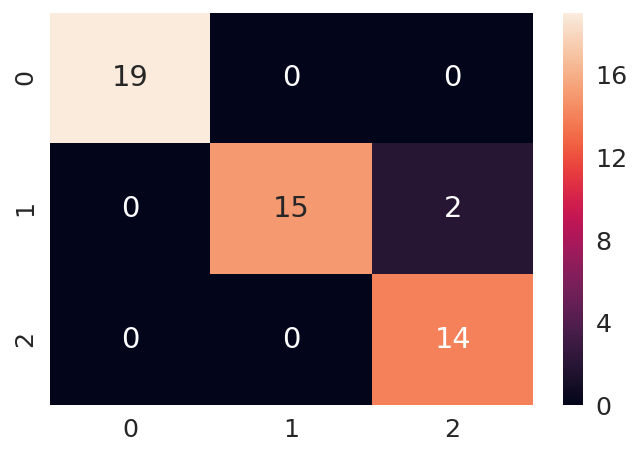

In [61]:
# generate and visualize Make-Moons dataset
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


X, y = nn.generate_data("iris")
X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))

ind = np.random.permutation(range(len(X)))
X_train, y_train, X_val, y_val = X[ind][:100], y[ind][:100], X[ind][100:], y[ind][100:]

model = DeepNeuralNetwork(layers_config = (4, 6, 6, 3),
                          activ_config = ('relu', 'relu', 'sigmoid'),
                          loss = 'xent',
                          epsilon = 1e-3,
                          reg_lambda = 1e-2)
model.fit_model(X_train, np.eye(3)[y_train], num_passes=60000)

pred = model.predict(X_val)

array = confusion_matrix(y_val,np.argmax(pred, axis=1))    
df_cm = pd.DataFrame(array, range(3),range(3))
plt.figure(dpi=130)
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# MNIST CNN

### Architecture: 
conv1(5-5-1-32) - ReLU - maxpool(2-2) - conv2(5-5-32-64) - ReLU - maxpool(2-2) - fc(1024) - ReLU - DropOut(0.5) - Softmax(10)

In [1]:
__author__ = 'tan_nguyen'

import os
import time

# Load MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Import Tensorflow and start a session
import tensorflow as tf
tf.reset_default_graph()

learning_rate = 1e-3
batch_size = 50


def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)
    

def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''

    # IMPLEMENT YOUR WEIGHT_VARIABLE HERE
    initial = tf.truncated_normal(shape, stddev=0.1)
    W = tf.Variable(initial)
    return W

def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters
    :return: a tensor variable for biases with initial values
    '''

    # IMPLEMENT YOUR BIAS_VARIABLE HERE
    initial = tf.constant(0.1, shape=shape)
    b = tf.Variable(initial)
    return b

def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    # IMPLEMENT YOUR CONV2D HERE
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    return h_conv

def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''
    
    # IMPLEMENT YOUR MAX_POOL_2X2 HERE
    h_max = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    return h_max


def conv_layer(x, dim, name, activation=tf.nn.relu):
    
    with tf.name_scope(name):
        with tf.name_scope('input'):
            variable_summaries(x)
            
        with tf.name_scope('weights'):
            W = weight_variable(dim)
            variable_summaries(W)
            
        with tf.name_scope('bias'):
            b = bias_variable([dim[-1]])
            variable_summaries(b)
            
        with tf.name_scope('activation'):
            z = conv2d(x, W) + b
            h = activation(z)
            variable_summaries(h)
            
        with tf.name_scope('activation_pooling'):
            a = max_pool_2x2(h)
            variable_summaries(a)
            
    return a


def fc_layer(x, dim, name, activation=tf.nn.relu):
    
    with tf.name_scope(name):
        with tf.name_scope('input'):
            x_flat = tf.reshape(x, [-1, dim[0]])
            variable_summaries(x_flat)
            
        with tf.name_scope('weights'):
            W = weight_variable(dim)
            variable_summaries(W)
            
        with tf.name_scope('bias'):
            b = bias_variable([dim[-1]])
            variable_summaries(b)
                    
        with tf.name_scope('activation'):
            z = tf.matmul(x_flat, W) + b
            h = activation(z)
            variable_summaries(h)
            
    return h



def main():
    
    with tf.device('/device:GPU:0'):
        
        # Specify training parameters
        result_dir = './results/res'+str(learning_rate)+'+bs'+str(batch_size) # directory where the results from the training are saved
        max_step = 5500 # the maximum iterations. After max_step iterations, the training will stop no matter what

        start_time = time.time() # start timing

        # FILL IN THE CODE BELOW TO BUILD YOUR NETWORK

        # placeholders for input data and input labeles
        x = tf.placeholder(tf.float32, [None, 784])
        y_ = tf.placeholder(tf.float32, [None, 10])

        # reshape the input image
        x_image = tf.reshape(x, [-1, 28, 28, 1])

        # first convolutional layer
        h_pool1 = conv_layer(x_image, [5, 5, 1, 32], 'conv1')
        
        # second convolutional layer
        h_pool2 = conv_layer(h_pool1, [5, 5, 32, 64], 'conv2')
        
        # densely connected layer
        h_fc1 = fc_layer(h_pool2,[7 * 7 * 64, 1024], 'fc1', tf.nn.relu)

        # dropout
        with tf.name_scope('dropout'):
            keep_prob = tf.placeholder(tf.float32)
            h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

        # softmax
        y_conv = fc_layer(h_fc1_drop,[1024, 10], 'fc2', tf.nn.softmax)

        # FILL IN THE FOLLOWING CODE TO SET UP THE TRAINING

        # setup training
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]), name="loss_function")
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
        correct_prediction = tf.cast(tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1)), tf.float32, name="correct_prediction")
        accuracy = tf.reduce_mean(correct_prediction, name="accuracy") 

        # Add a scalar summary for the snapshot loss.
        tf.summary.scalar("cross_entropy", cross_entropy)
        tf.summary.scalar("val_accuracy", accuracy)
        
        # Build the summary operation based on the TF collection of Summaries.
        summary_op = tf.summary.merge_all()

        # Add the variable initializer Op.
        init = tf.initialize_all_variables()

        # Create a saver for writing training checkpoints.
        saver = tf.train.Saver()

    
    with tf.Session(config=tf.ConfigProto(allow_soft_placement = True)) as sess:

        # Instantiate a SummaryWriter to output summaries and the Graph.
        summary_writer = tf.summary.FileWriter(result_dir, sess.graph)

        # Run the Op to initialize the variables.
        sess.run(init)

        # run the training
        for i in range(max_step):
            batch = mnist.train.next_batch(batch_size) # make the data batch, which is used in the training iteration.
                                                # the batch size is 50
            if i%100 == 0:
                # output the training accuracy every 100 iterations
                train_accuracy = accuracy.eval(feed_dict={
                    x:batch[0], y_:batch[1], keep_prob: 1.0})
                
                test_accuracy = accuracy.eval(feed_dict={
                    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})
                
                print("step %d, training accuracy %g"%(i, train_accuracy),
                      "test accuracy %g"%test_accuracy)
                
                # Update the events file which is used to monitor the training (in this case,
                # only the training loss is monitored)
                summary_str = sess.run(summary_op, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
                summary_writer.add_summary(summary_str, i)
                summary_writer.flush()

            # save the checkpoints every 1100 iterations
            if i % 1100 == 0 or i == max_step:
                checkpoint_file = os.path.join(result_dir, 'checkpoint')
                saver.save(sess, checkpoint_file, global_step=i)

            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5}) # run one train_step

            
        # print test error
        test_accuracy = accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

    stop_time = time.time()
    print('The training takes %f second to finish'%(stop_time - start_time))

if __name__ == "__main__":
    main()


/home/bl41/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


ResourceExhaustedError: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv1/activation/Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1/activation/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, conv1/weights/Variable/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv1/activation/Conv2D', defined at:
  File "/home/bl41/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/bl41/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/bl41/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/bl41/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/bl41/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-83237a3e9cfc>", line 245, in <module>
    main()
  File "<ipython-input-1-83237a3e9cfc>", line 162, in main
    h_pool1 = conv_layer(x_image, [5, 5, 1, 32], 'conv1', tf.nn.tanh)
  File "<ipython-input-1-83237a3e9cfc>", line 107, in conv_layer
    z = conv2d(x, W) + b
  File "<ipython-input-1-83237a3e9cfc>", line 77, in conv2d
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 956, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/home/bl41/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv1/activation/Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1/activation/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, conv1/weights/Variable/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

